# Import libraries

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [54]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

# Import files/datasets

In [55]:
# Import ".json" file for the World. 

world_geo = r'/Users/gil/Downloads/world-countries.json'


In [56]:
# Checking the JSON file contents:

f = open(r'/Users/gil/Downloads/world-countries.json',)
  
# returns JSON object asa dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'properties': {'name': 'Afghanistan'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[61.210817, 35.650072], [62.230651, 35.270664], [62.984662, 35.404041], [63.193538, 35.857166], [63.982896, 36.007957], [64.546479, 36.312073], [64.746105, 37.111818], [65.588948, 37.305217], [65.745631, 37.661164], [66.217385, 37.39379], [66.518607, 37.362784], [67.075782, 37.356144], [67.83, 37.144994], [68.135562, 37.023115], [68.859446, 37.344336], [69.196273, 37.151144], [69.518785, 37.608997], [70.116578, 37.588223], [70.270574, 37.735165], [70.376304, 38.138396], [70.806821, 38.486282], [71.348131, 38.258905], [71.239404, 37.953265], [71.541918, 37.905774], [71.448693, 37.065645], [71.844638, 36.738171], [72.193041, 36.948288], [72.63689, 37.047558], [73.260056, 37.495257], [73.948696, 37.421566], [74.980002, 37.41999], [75.158028, 37.133031], [74.575893, 37.020841], [74.067552, 36.836176], [72.920025, 36.720007], [71.846292, 36.509942], [71.262348, 36.074388], [71.498768,

In [57]:
#define the path of the main folder
path = r'/Users/gil/Downloads/World Happiness'

In [58]:
#import combined_data_checked.csv
df_combined = pd.read_csv(os.path.join(path, 'Data', 'Prepared data', 'combined_data_checked_2.csv'), index_col = False)


In [59]:
df_combined.shape


(777, 18)

In [60]:
df_combined.head()

Unnamed: 0.1  Unnamed: 0      Country          Region  Year  \
0             0           0  Switzerland  Western Europe  2015   
1             1           1      Iceland  Western Europe  2015   
2             2           2      Denmark  Western Europe  2015   
3             3           3       Norway  Western Europe  2015   
4             4           4       Canada   North America  2015   

   Happiness Rank  Happiness Score  Economy (GDP per Capita)  Family  \
0               1              7.6                       1.4     1.4   
1               2              7.6                       1.3     1.4   
2               3              7.5                       1.3     1.4   
3               4              7.5                       1.5     1.3   
4               5              7.4                       1.3     1.3   

   Health (Life Expectancy)  Freedom to make life choices  Generosity  \
0                       0.9                           0.7         0.3   
1                       1.0                           0.6         0.4   
2                       0.9                           0.6         0.3   
3                       0.9                           0.7         0.4   
4                       0.9                           0.6         0.5   

   Trust (Government Corruption)      Financial status  \
0                            0.4  Financially well-off   
1                            0.1   Financially average   
2                            0.5   Financially average   
3                            0.4  Financially well-off   
4                            0.3   Financially average   

          Government status  Health level  Unnamed: 16  Unnamed: 17  
0     High government trust  Very healthy          NaN          NaN  
1      Low government trust  Very healthy          NaN          NaN  
2     High government trust  Very healthy          NaN          NaN  
3     High government trust  Very healthy          NaN          NaN  
4  Average government trust  Very healthy          NaN          NaN

# 5. Data wrangling

In [61]:
#drop column Unnamed 
df_combined = df_combined.drop(columns = ['Unnamed: 0.1'])


In [71]:
#drop column Unnamed 
df_combined = df_combined.drop(columns = ['Unnamed: 16'])

In [72]:
#drop column Unnamed 
df_combined = df_combined.drop(columns = ['Unnamed: 17'])

In [73]:
df_combined.head()

Country          Region  Year  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe  2015               1              7.6   
1      Iceland  Western Europe  2015               2              7.6   
2      Denmark  Western Europe  2015               3              7.5   
3       Norway  Western Europe  2015               4              7.5   
4       Canada   North America  2015               5              7.4   

   Economy  Family  Health  Freedom  Generosity  Government trust  \
0      1.4     1.4     0.9      0.7         0.3               0.4   
1      1.3     1.4     1.0      0.6         0.4               0.1   
2      1.3     1.4     0.9      0.6         0.3               0.5   
3      1.5     1.3     0.9      0.7         0.4               0.4   
4      1.3     1.3     0.9      0.6         0.5               0.3   

       Financial status         Government status  Health level  
0  Financially well-off     High government trust  Very healthy  
1   Financially average      Low government trust  Very healthy  
2   Financially average     High government trust  Very healthy  
3  Financially well-off     High government trust  Very healthy  
4   Financially average  Average government trust  Very healthy

In [74]:
#rename columns to make names shorter
df_combined.rename(columns = {'Economy (GDP per Capita)' : 'Economy'}, inplace = True)


In [75]:
#rename columns to make names shorter
df_combined.rename(columns = {'Trust (Government Corruption)' : 'Government trust'}, inplace = True)

In [76]:
#rename columns to make names shorter
df_combined.rename(columns = {'Health (Life Expectancy)' : 'Health'}, inplace = True)

In [77]:
#rename columns to make names shorter
df_combined.rename(columns = {'Freedom to make life choices' : 'Freedom'}, inplace = True)


In [78]:
df_combined.head()

Country          Region  Year  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe  2015               1              7.6   
1      Iceland  Western Europe  2015               2              7.6   
2      Denmark  Western Europe  2015               3              7.5   
3       Norway  Western Europe  2015               4              7.5   
4       Canada   North America  2015               5              7.4   

   Economy  Family  Health  Freedom  Generosity  Government trust  \
0      1.4     1.4     0.9      0.7         0.3               0.4   
1      1.3     1.4     1.0      0.6         0.4               0.1   
2      1.3     1.4     0.9      0.6         0.3               0.5   
3      1.5     1.3     0.9      0.7         0.4               0.4   
4      1.3     1.3     0.9      0.6         0.5               0.3   

       Financial status         Government status  Health level  
0  Financially well-off     High government trust  Very healthy  
1   Financially average      Low government trust  Very healthy  
2   Financially average     High government trust  Very healthy  
3  Financially well-off     High government trust  Very healthy  
4   Financially average  Average government trust  Very healthy

# 6. Data cleaning

In [79]:
#check for missing values
df_combined.isnull().sum()

Country              0
Region               0
Year                 0
Happiness Rank       0
Happiness Score      0
Economy              0
Family               0
Health               0
Freedom              0
Generosity           0
Government trust     1
Financial status     0
Government status    0
Health level         0
dtype: int64

In [80]:
df_dupes_combined = df_combined[df_combined.duplicated()]

In [81]:
df_dupes_combined

Empty DataFrame
Columns: [Country, Region, Year, Happiness Rank, Happiness Score, Economy, Family, Health, Freedom, Generosity, Government trust, Financial status, Government status, Health level]
Index: []

<Axes: xlabel='Economy', ylabel='Count'>

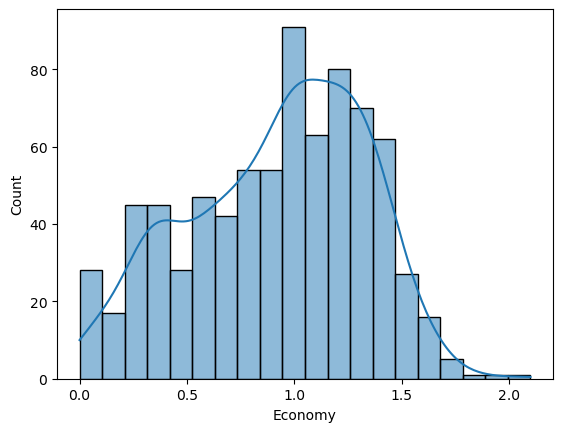

In [82]:
sns.histplot(df_combined['Economy'], bins=20, kde = True) # shows extreme values for Economy

<Axes: xlabel='Health', ylabel='Count'>

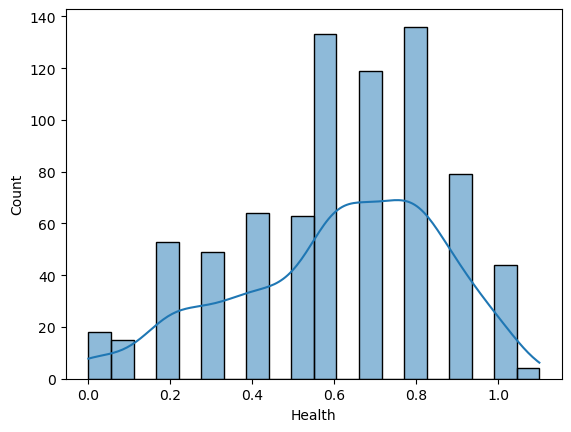

In [83]:
sns.histplot(df_combined['Health'], bins=20, kde = True) # shows extreme values for Economy

# 7. Creating choropleth map

In [84]:
# Create a data frame with just the states and the values for rating we want plotted

data_to_plot = df_combined[['Country','Happiness Score']]
data_to_plot.head()

Country  Happiness Score
0  Switzerland              7.6
1      Iceland              7.6
2      Denmark              7.5
3       Norway              7.5
4       Canada              7.4

In [85]:
map = folium.Map(location = [40, -95], zoom_start = 4)

folium.Choropleth(
    geo_data = world_geo, 
    data = data_to_plot,
    columns = ['Country', 'Happiness Score'],
    key_on = 'feature.properties.name',
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Score").add_to(map)

folium.LayerControl().add_to(map)

map

# 8. Discuss the results and what they mean in a markdown section.
From the map, we can clearly see that happiness level is regional. There is almost no region, where one country is very happy, and one of its neighbors, very unhappy. 
We can see that the happiest countries are in Western Europe, as well as in North America. The least happy countries are in Africa and South-East Asia. 
The countries in black indicate that there is no data on them (ex. North Korea, Greenland). 